# Исследование объявлений о продаже квартир

<b>Цель:</b> Используя данные сервиса Яндекс.Недвижимость, определить рыночную стоимость объектов недвижимости и типичные параметры квартир <br>
<b>Описание проекта:</b> На основе данных сервиса Яндекс.Недвижимость определена рыночная стоимость
объектов недвижимости разного типа, типичные параметры квартир, в зависимости от
удаленности от центра. Проведена предобработка данных. Добавлены новые данные.
Построены гистограммы, боксплоты, диаграммы рассеивания.

## Изучение данных из файла

In [1]:
import pandas as pd

import datetime
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('/datasets/real_estate_data.csv', sep='\t')
pd.options.display.float_format = '{:,.2f}'.format

In [2]:
display(df.head())

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,"13,000,000.00",108.00,2019-03-07T00:00:00,3,2.70,16.00,51.00,8,NaN,...,25.00,NaN,Санкт-Петербург,"18,863.00","16,028.00",1.00,482.00,2.00,755.00,NaN
1,7,"3,350,000.00",40.40,2018-12-04T00:00:00,1,NaN,11.00,18.60,1,NaN,...,11.00,2.00,посёлок Шушары,"12,817.00","18,603.00",0.00,NaN,0.00,NaN,81.00
2,10,"5,196,000.00",56.00,2015-08-20T00:00:00,2,NaN,5.00,34.30,4,NaN,...,8.30,0.00,Санкт-Петербург,"21,741.00","13,933.00",1.00,90.00,2.00,574.00,558.00
3,0,"64,900,000.00",159.00,2015-07-24T00:00:00,3,NaN,14.00,NaN,9,NaN,...,NaN,0.00,Санкт-Петербург,"28,098.00","6,800.00",2.00,84.00,3.00,234.00,424.00
4,2,"10,000,000.00",100.00,2018-06-19T00:00:00,2,3.03,14.00,32.00,13,NaN,...,41.00,NaN,Санкт-Петербург,"31,856.00","8,098.00",2.00,112.00,1.00,48.00,121.00


In [3]:
display(df.tail())

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
23694,9,"9,700,000.00",133.81,2017-03-21T00:00:00,3,3.70,5.00,73.30,3,NaN,...,13.83,NaN,Санкт-Петербург,"24,665.00","4,232.00",1.00,796.00,3.00,381.00,NaN
23695,14,"3,100,000.00",59.00,2018-01-15T00:00:00,3,NaN,5.00,38.00,4,NaN,...,8.50,NaN,Тосно,NaN,NaN,NaN,NaN,NaN,NaN,45.00
23696,18,"2,500,000.00",56.70,2018-02-11T00:00:00,2,NaN,3.00,29.70,1,NaN,...,NaN,NaN,село Рождествено,NaN,NaN,NaN,NaN,NaN,NaN,NaN
23697,13,"11,475,000.00",76.75,2017-03-28T00:00:00,2,3.00,17.00,NaN,12,NaN,...,23.30,2.00,Санкт-Петербург,"39,140.00","10,364.00",2.00,173.00,3.00,196.00,602.00
23698,4,"1,350,000.00",32.30,2017-07-21T00:00:00,1,2.50,5.00,12.30,1,NaN,...,9.00,NaN,поселок Новый Учхоз,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

### Вывод

После первичного изучения данных видно, что таблица состоит из 22 столбцов. Строк в таблице 23699. В 14-ти столбцах есть пропуски. Причем в некоторых довольно большое кол-во. Типы данных колонок: булевый(2), вещественный(14), целочисленный(3), object(3)

## Предобработка данных

In [5]:
df.isna().sum()

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height           9195
floors_total               86
living_area              1903
floor                       0
is_apartment            20924
studio                      0
open_plan                   0
kitchen_area             2278
balcony                 11519
locality_name              49
airports_nearest         5542
cityCenters_nearest      5519
parks_around3000         5518
parks_nearest           15620
ponds_around3000         5518
ponds_nearest           14589
days_exposition          3181
dtype: int64

In [6]:
# check
# пропущенные значения бары

def pass_value(df):
    (
        (df.isna().mean()*100)
        .to_frame()
        .rename(columns = {0:'space'})
        .query('space > 0')
        .sort_values(by = 'space', ascending = False)
        .plot(kind= 'bar', figsize=(19,4), rot = 10)
        .set_title('Кол-во пропусков в датасете ...' + '\n')
    );

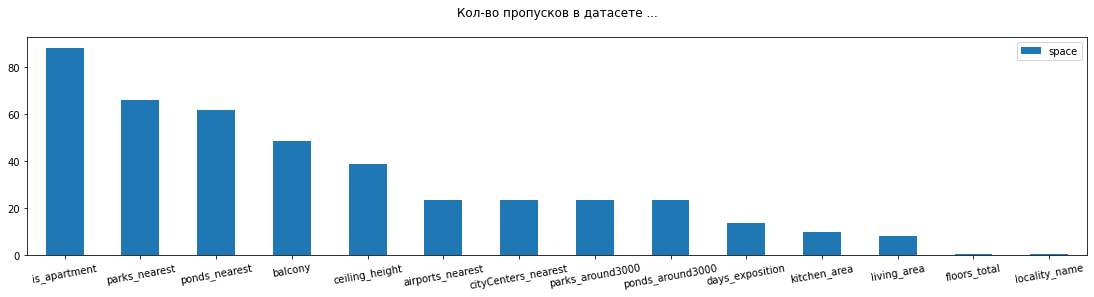

In [7]:
pass_value(df)

In [8]:
df['is_apartment'].unique()

array([nan, False, True], dtype=object)

Данное значение решено заполнить значением False, идея в том что если пользователь не указал, что это аппартаменты, то это не аппартаменты.

In [9]:
df['is_apartment'] = df['is_apartment'].fillna(value=False)

Пропуски в столбцах: Число балкона, Число парка, Число водоема, принято решение заполнить значением 0

In [10]:
df['parks_around3000'] = df['parks_around3000'].fillna(value=0)

In [11]:
df['ponds_around3000'] = df['ponds_around3000'].fillna(value=0)

In [12]:
df['balcony'] = df['balcony'].fillna(value=0)

Количество пропусков в столбцах floors_total и  locality_name  довольно мало - 86 и 49. Решено удалить строки с данными пропусками, т.к этажность и расположение это важный паррамметр при выборе квартиры.

In [13]:
df['floors_total'].unique()

array([16., 11.,  5., 14., 12., 26., 24., 27.,  9.,  6., 17., 25.,  3.,
       23., 19., 18.,  4., 22.,  8.,  2., 10.,  7., 13., 15., nan, 20.,
       28., 36., 21., 35., 34., 60.,  1., 29., 33., 52., 37.])

In [14]:
df['locality_name'].unique()

array(['Санкт-Петербург', 'посёлок Шушары', 'городской посёлок Янино-1',
       'посёлок Парголово', 'посёлок Мурино', 'Ломоносов', 'Сертолово',
       'Петергоф', 'Пушкин', 'деревня Кудрово', 'Коммунар', 'Колпино',
       'поселок городского типа Красный Бор', 'Гатчина', 'поселок Мурино',
       'деревня Фёдоровское', 'Выборг', 'Кронштадт', 'Кировск',
       'деревня Новое Девяткино', 'посёлок Металлострой',
       'посёлок городского типа Лебяжье',
       'посёлок городского типа Сиверский', 'поселок Молодцово',
       'поселок городского типа Кузьмоловский',
       'садовое товарищество Новая Ропша', 'Павловск',
       'деревня Пикколово', 'Всеволожск', 'Волхов', 'Кингисепп',
       'Приозерск', 'Сестрорецк', 'деревня Куттузи', 'посёлок Аннино',
       'поселок городского типа Ефимовский', 'посёлок Плодовое',
       'деревня Заклинье', 'поселок Торковичи', 'поселок Первомайское',
       'Красное Село', 'посёлок Понтонный', 'Сясьстрой', 'деревня Старая',
       'деревня Лесколово', '

In [15]:
df = df.drop(df[df.floors_total == 'nan'].index)
print('Кол-во значений = nan в floors_total:', df[df['floors_total'] == 'nan' ]['floors_total'].count())

df = df.drop(df[df.locality_name == 'nan'].index)
print('Кол-во значений = nan в locality_name:', df[df['locality_name'] == 'nan' ]['locality_name'].count())

Кол-во значений = nan в floors_total: 0
Кол-во значений = nan в locality_name: 0


В остальных столбцах принято решение на данный момент не убирать пропуски

При просмотре информации о таблице было обнаруженно два столбца с типом данных is_apartment и locality_name. В столбце is_apartment будет логичным изменить тип данных на bool, т.к в нем содержатся будевы значения. locality_name будет логично заменить на тип данных str, т.к в нем содержаться строки с адрессами. Столбец first_day_exposition решено привести к формату %Y-%m-%dT%H:%M:%S (datetime) Столбец locality_name преведен к формату category

In [16]:
df['is_apartment'] = df['is_apartment'].astype('bool')
df['locality_name'] = df['locality_name'].astype('category')
df['first_day_exposition'] = pd.to_datetime(df['first_day_exposition'], format='%Y-%m-%dT%H:%M:%S')

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   total_images          23699 non-null  int64         
 1   last_price            23699 non-null  float64       
 2   total_area            23699 non-null  float64       
 3   first_day_exposition  23699 non-null  datetime64[ns]
 4   rooms                 23699 non-null  int64         
 5   ceiling_height        14504 non-null  float64       
 6   floors_total          23613 non-null  float64       
 7   living_area           21796 non-null  float64       
 8   floor                 23699 non-null  int64         
 9   is_apartment          23699 non-null  bool          
 10  studio                23699 non-null  bool          
 11  open_plan             23699 non-null  bool          
 12  kitchen_area          21421 non-null  float64       
 13  balcony         

В названиях населенных пунктов, проверка корректности заполнения столбца locality_name:

- буквы ё — е 

- различное написание типа населенного пункта


In [18]:
#преобразуем строки в нижний регистр и заменим все вхождения символа "ё" на "е" и удалим отступы в начале и конце строки
print('Кол-во вхождений "ё"', df['locality_name'].str.count('ё').sum())
print('Кол-во уникальных значений', len(df['locality_name'].unique()))
df['locality_name'] = df['locality_name'].str.lower().str.replace('ё', 'е').str.strip()
print('Кол-во вхождений "ё"', df['locality_name'].str.count('ё').sum())
print('Кол-во уникальных значений', len(df['locality_name'].unique()))

Кол-во вхождений "ё" 2173.0
Кол-во уникальных значений 365
Кол-во вхождений "ё" 0.0
Кол-во уникальных значений 331


Далее проведем проверку дублирования записей. Для этого проверим записи на дубли по следующим параметрам:
- общ. площадь, этаж, общая этажность, расстояние до центра, название населенного пункта, дата объявления 
- общ. площадь, этаж, название населенного пункта, стоимость
- общ. площадь, этаж, название населенного пункта, дата объявления
- общ. площадь, стоимость, название населенного пункта, дата объявления

In [19]:
df.duplicated(subset=['total_area', 'floor', 'floors_total', 'cityCenters_nearest', 'locality_name', 'first_day_exposition'], keep='first').sum()

3

In [20]:
df.duplicated(subset=['total_area', 'floor', 'floors_total', 'locality_name', 'last_price'], keep='first').sum()

234

In [21]:
df.duplicated(subset=['total_area', 'floor', 'locality_name', 'first_day_exposition'], keep='first').sum()

68

In [22]:
df.duplicated(subset=['total_area', 'last_price', 'locality_name', 'first_day_exposition'], keep='first').sum()

14

Теперь удалим дубликаты:

In [23]:
print('Дубликатов до:', df.duplicated(subset=['total_area', 'floor', 'floors_total', 'cityCenters_nearest', 'locality_name', 'first_day_exposition'], keep='first').sum())
df = df.drop_duplicates(subset=['total_area', 'floor', 'floors_total', 'cityCenters_nearest', 'locality_name', 'first_day_exposition'], keep='last')
print('Дубликатов после:',df.duplicated(subset=['total_area', 'floor', 'floors_total', 'cityCenters_nearest', 'locality_name', 'first_day_exposition'], keep='first').sum())

Дубликатов до: 3
Дубликатов после: 0


In [24]:
print('Дубликатов до:', df.duplicated(subset=['total_area', 'floor', 'floors_total', 'locality_name', 'last_price'], keep='first').sum())
df = df.drop_duplicates(subset=['total_area', 'floor', 'floors_total', 'locality_name', 'last_price'], keep='last')
print('Дубликатов после:',df.duplicated(subset=['total_area', 'floor', 'floors_total', 'locality_name', 'last_price'], keep='first').sum())

Дубликатов до: 234
Дубликатов после: 0


In [25]:
print('Дубликатов до:', df.duplicated(subset=['total_area', 'floor', 'locality_name', 'first_day_exposition'], keep='first').sum())
df = df.drop_duplicates(subset=['total_area', 'floor', 'locality_name', 'first_day_exposition'], keep='last')
print('Дубликатов после:',df.duplicated(subset=['total_area', 'floor', 'locality_name', 'first_day_exposition'], keep='first').sum())

Дубликатов до: 63
Дубликатов после: 0


In [26]:
print('Дубликатов до:', df.duplicated(subset=['total_area', 'last_price', 'locality_name', 'first_day_exposition'], keep='first').sum())
df = df.drop_duplicates(subset=['total_area', 'last_price', 'locality_name', 'first_day_exposition'], keep='last')
print('Дубликатов после:',df.duplicated(subset=['total_area', 'last_price', 'locality_name', 'first_day_exposition'], keep='first').sum())

Дубликатов до: 10
Дубликатов после: 0


### Вывод

На данном этапе были найденны и заменены пропущенные значения. Изменены типы данных столбцов. Так же был выполнен поиск дублей по нескольким парамметрам. В ходе подбора вариантов парамметров для поиска дублей, было принято так же использовать в вариациях дату размещения, т.к. это позволит случайно не удалить похожие объекты и с большей увереностью говорить о том что данные объекты являются дублями.

## Расчёты и добавление результатов в таблицу

Расчитаем стоимость квадратно метра и сохраним результат в столбец count_kv_metr

In [27]:
df['count_kv_metr'] = df['last_price'] / df['total_area']
display(df.head())

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,count_kv_metr
0,20,"13,000,000.00",108.00,2019-03-07,3,2.70,16.00,51.00,8,False,...,0.00,санкт-петербург,"18,863.00","16,028.00",1.00,482.00,2.00,755.00,NaN,"120,370.37"
1,7,"3,350,000.00",40.40,2018-12-04,1,NaN,11.00,18.60,1,False,...,2.00,поселок шушары,"12,817.00","18,603.00",0.00,NaN,0.00,NaN,81.00,"82,920.79"
2,10,"5,196,000.00",56.00,2015-08-20,2,NaN,5.00,34.30,4,False,...,0.00,санкт-петербург,"21,741.00","13,933.00",1.00,90.00,2.00,574.00,558.00,"92,785.71"
3,0,"64,900,000.00",159.00,2015-07-24,3,NaN,14.00,NaN,9,False,...,0.00,санкт-петербург,"28,098.00","6,800.00",2.00,84.00,3.00,234.00,424.00,"408,176.10"
4,2,"10,000,000.00",100.00,2018-06-19,2,3.03,14.00,32.00,13,False,...,0.00,санкт-петербург,"31,856.00","8,098.00",2.00,112.00,1.00,48.00,121.00,"100,000.00"


Добавим день недели на основании известной даты публикации и сохраним результаты в столбец day_of_week

In [28]:

df['day_of_week'] = df['first_day_exposition'].dt.day_name()
display(df.head())

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,count_kv_metr,day_of_week
0,20,"13,000,000.00",108.00,2019-03-07,3,2.70,16.00,51.00,8,False,...,санкт-петербург,"18,863.00","16,028.00",1.00,482.00,2.00,755.00,NaN,"120,370.37",Thursday
1,7,"3,350,000.00",40.40,2018-12-04,1,NaN,11.00,18.60,1,False,...,поселок шушары,"12,817.00","18,603.00",0.00,NaN,0.00,NaN,81.00,"82,920.79",Tuesday
2,10,"5,196,000.00",56.00,2015-08-20,2,NaN,5.00,34.30,4,False,...,санкт-петербург,"21,741.00","13,933.00",1.00,90.00,2.00,574.00,558.00,"92,785.71",Thursday
3,0,"64,900,000.00",159.00,2015-07-24,3,NaN,14.00,NaN,9,False,...,санкт-петербург,"28,098.00","6,800.00",2.00,84.00,3.00,234.00,424.00,"408,176.10",Friday
4,2,"10,000,000.00",100.00,2018-06-19,2,3.03,14.00,32.00,13,False,...,санкт-петербург,"31,856.00","8,098.00",2.00,112.00,1.00,48.00,121.00,"100,000.00",Tuesday


Добавим месяц в столбец month

In [29]:

df['month'] = df['first_day_exposition'].dt.month


display(df.head())

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,count_kv_metr,day_of_week,month
0,20,"13,000,000.00",108.00,2019-03-07,3,2.70,16.00,51.00,8,False,...,"18,863.00","16,028.00",1.00,482.00,2.00,755.00,NaN,"120,370.37",Thursday,3
1,7,"3,350,000.00",40.40,2018-12-04,1,NaN,11.00,18.60,1,False,...,"12,817.00","18,603.00",0.00,NaN,0.00,NaN,81.00,"82,920.79",Tuesday,12
2,10,"5,196,000.00",56.00,2015-08-20,2,NaN,5.00,34.30,4,False,...,"21,741.00","13,933.00",1.00,90.00,2.00,574.00,558.00,"92,785.71",Thursday,8
3,0,"64,900,000.00",159.00,2015-07-24,3,NaN,14.00,NaN,9,False,...,"28,098.00","6,800.00",2.00,84.00,3.00,234.00,424.00,"408,176.10",Friday,7
4,2,"10,000,000.00",100.00,2018-06-19,2,3.03,14.00,32.00,13,False,...,"31,856.00","8,098.00",2.00,112.00,1.00,48.00,121.00,"100,000.00",Tuesday,6


Добавим год в столбец year

In [30]:
df['year'] = df['first_day_exposition'].dt.year
display(df.head())

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,count_kv_metr,day_of_week,month,year
0,20,"13,000,000.00",108.00,2019-03-07,3,2.70,16.00,51.00,8,False,...,"16,028.00",1.00,482.00,2.00,755.00,NaN,"120,370.37",Thursday,3,2019
1,7,"3,350,000.00",40.40,2018-12-04,1,NaN,11.00,18.60,1,False,...,"18,603.00",0.00,NaN,0.00,NaN,81.00,"82,920.79",Tuesday,12,2018
2,10,"5,196,000.00",56.00,2015-08-20,2,NaN,5.00,34.30,4,False,...,"13,933.00",1.00,90.00,2.00,574.00,558.00,"92,785.71",Thursday,8,2015
3,0,"64,900,000.00",159.00,2015-07-24,3,NaN,14.00,NaN,9,False,...,"6,800.00",2.00,84.00,3.00,234.00,424.00,"408,176.10",Friday,7,2015
4,2,"10,000,000.00",100.00,2018-06-19,2,3.03,14.00,32.00,13,False,...,"8,098.00",2.00,112.00,1.00,48.00,121.00,"100,000.00",Tuesday,6,2018


Далее добавим варианты — первый, последний, другой к описанию этажа квартиры. Данные добавим в столбец apartment floor

In [31]:
def floor(row):
    fl = row['floor']
    fl_total = row['floors_total']
    if fl == 1:
        return 'первый'
    if fl == fl_total:
        return 'последний'
    else:
        return 'другой'

df['apartment_floor'] = df.apply(floor, axis=1)
display(df.head())

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,count_kv_metr,day_of_week,month,year,apartment_floor
0,20,"13,000,000.00",108.00,2019-03-07,3,2.70,16.00,51.00,8,False,...,1.00,482.00,2.00,755.00,NaN,"120,370.37",Thursday,3,2019,другой
1,7,"3,350,000.00",40.40,2018-12-04,1,NaN,11.00,18.60,1,False,...,0.00,NaN,0.00,NaN,81.00,"82,920.79",Tuesday,12,2018,первый
2,10,"5,196,000.00",56.00,2015-08-20,2,NaN,5.00,34.30,4,False,...,1.00,90.00,2.00,574.00,558.00,"92,785.71",Thursday,8,2015,другой
3,0,"64,900,000.00",159.00,2015-07-24,3,NaN,14.00,NaN,9,False,...,2.00,84.00,3.00,234.00,424.00,"408,176.10",Friday,7,2015,другой
4,2,"10,000,000.00",100.00,2018-06-19,2,3.03,14.00,32.00,13,False,...,2.00,112.00,1.00,48.00,121.00,"100,000.00",Tuesday,6,2018,другой


Посчитаем соотношение жилой и общей площади, а также отношение площади кухни к общей. Первое соотношение сохраним в столбец  lv_total, а второе в kch_total

In [32]:
df['lv_total'] = df['living_area'] / df['total_area']
df['kch_total'] = df['kitchen_area'] / df['total_area']
display(df.head())

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,ponds_around3000,ponds_nearest,days_exposition,count_kv_metr,day_of_week,month,year,apartment_floor,lv_total,kch_total
0,20,"13,000,000.00",108.00,2019-03-07,3,2.70,16.00,51.00,8,False,...,2.00,755.00,NaN,"120,370.37",Thursday,3,2019,другой,0.47,0.23
1,7,"3,350,000.00",40.40,2018-12-04,1,NaN,11.00,18.60,1,False,...,0.00,NaN,81.00,"82,920.79",Tuesday,12,2018,первый,0.46,0.27
2,10,"5,196,000.00",56.00,2015-08-20,2,NaN,5.00,34.30,4,False,...,2.00,574.00,558.00,"92,785.71",Thursday,8,2015,другой,0.61,0.15
3,0,"64,900,000.00",159.00,2015-07-24,3,NaN,14.00,NaN,9,False,...,3.00,234.00,424.00,"408,176.10",Friday,7,2015,другой,NaN,NaN
4,2,"10,000,000.00",100.00,2018-06-19,2,3.03,14.00,32.00,13,False,...,1.00,48.00,121.00,"100,000.00",Tuesday,6,2018,другой,0.32,0.41


Изучим следубщие парамметры: площадь, цена, число комнат, высота потолков

In [33]:
df['total_area'].value_counts()

45.00     386
42.00     366
44.00     332
60.00     331
31.00     319
         ... 
56.85       1
37.92       1
115.60      1
117.40      1
55.06       1
Name: total_area, Length: 2182, dtype: int64

In [34]:
df['total_area'].describe()

count   23,389.00
mean        60.48
std         35.79
min         12.00
25%         40.00
50%         52.00
75%         70.00
max        900.00
Name: total_area, dtype: float64

Построим гистограмму на основе данных

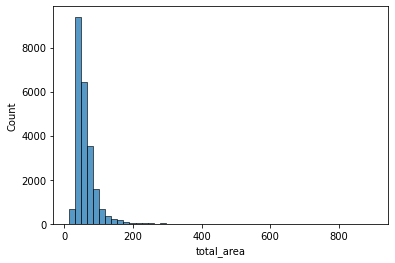

In [35]:


sns.histplot(x='total_area', data=df, bins=50)
plt.show()

Вывод: Из полученных данных видно что выборка данных по площади имеет довольно большой диапазон - мин: 12, макс: 900. Стандартное отклонение данных довольно велико. ПРи этом средня и медиана довольно близки. Видно что в данных  присутвуют выбросы, чем могут вприципе являться эксклюзивные предложения по площади на рынке.

In [36]:
df['last_price'].value_counts()

4,500,000.00     334
3,500,000.00     282
4,200,000.00     255
4,000,000.00     253
3,600,000.00     252
                ... 
10,430,000.00      1
9,917,600.00       1
3,180,500.00       1
7,297,000.00       1
4,386,000.00       1
Name: last_price, Length: 2973, dtype: int64

In [37]:
df['last_price'].describe()

count        23,389.00
mean      6,558,676.27
std      10,941,990.61
min          12,190.00
25%       3,400,000.00
50%       4,650,000.00
75%       6,800,000.00
max     763,000,000.00
Name: last_price, dtype: float64

In [38]:
print('выведем максимальную и минимальную цену', df['last_price'].max(), df['last_price'].min())

выведем максимальную и минимальную цену 763000000.0 12190.0


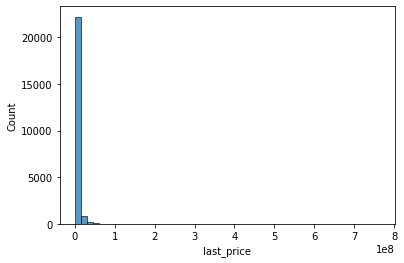

In [39]:
sns.histplot(x='last_price', data=df, bins=50)
plt.show()

Вывод: Из данных видно, что есть выбрасы в ценовом диапазоне. Если максимальное значение еще может иметь место быть на рынке, то минимально довольно маленькое и вызывает большие сомнения в правдоподобности. Далее проанализируем подробнее.

In [40]:
df['last_price'].mean().round(1)

6558676.3

In [41]:
df[df['last_price'] < 1_000_000][['last_price', 'total_area', 'rooms', 'ceiling_height', 
                                  'floors_total', 'living_area', 'floor','locality_name', 'cityCenters_nearest']]

,last_price,total_area,rooms,ceiling_height,floors_total,living_area,floor,locality_name,cityCenters_nearest
164,"800,000.00",40.30,2,NaN,3.00,NaN,1,поселок городского типа ефимовский,NaN
247,"650,000.00",31.00,1,NaN,3.00,NaN,1,сланцы,NaN
259,"900,000.00",30.00,1,2.50,5.00,15.00,4,ивангород,NaN
268,"650,000.00",46.00,2,2.50,5.00,30.00,5,сланцы,NaN
293,"900,000.00",42.80,2,NaN,5.00,32.00,5,сясьстрой,NaN
...,...,...,...,...,...,...,...,...,...
23067,"600,000.00",31.80,1,NaN,2.00,20.00,1,деревня коркино,NaN
23153,"650,000.00",41.00,2,NaN,3.00,28.00,1,бокситогорск,NaN
23354,"900,000.00",42.60,2,NaN,2.00,28.00,1,деревня тихковицы,NaN
23484,"470,000.00",44.50,2,NaN,2.00,28.00,2,сланцы,NaN


In [42]:
df[df['last_price'] < 1_000_000][['locality_name']].value_counts().to_frame().rename(columns = {0: 'count'}).head(20)

,count
locality_name,
сланцы,82
бокситогорск,14
пикалево,11
ивангород,5
поселок городского типа вырица,4
луга,4
кириши,4
поселок городского типа никольский,4
выборг,4


Оставим в выборке объекты только находящиеся в СПБ и расмотрим еще раз стоимость объектов.

In [43]:
df_spb = df[df['locality_name'] == 'санкт-петербург']
df_spb.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,ponds_around3000,ponds_nearest,days_exposition,count_kv_metr,day_of_week,month,year,apartment_floor,lv_total,kch_total
0,20,"13,000,000.00",108.00,2019-03-07,3,2.70,16.00,51.00,8,False,...,2.00,755.00,NaN,"120,370.37",Thursday,3,2019,другой,0.47,0.23
2,10,"5,196,000.00",56.00,2015-08-20,2,NaN,5.00,34.30,4,False,...,2.00,574.00,558.00,"92,785.71",Thursday,8,2015,другой,0.61,0.15
3,0,"64,900,000.00",159.00,2015-07-24,3,NaN,14.00,NaN,9,False,...,3.00,234.00,424.00,"408,176.10",Friday,7,2015,другой,NaN,NaN
4,2,"10,000,000.00",100.00,2018-06-19,2,3.03,14.00,32.00,13,False,...,1.00,48.00,121.00,"100,000.00",Tuesday,6,2018,другой,0.32,0.41
7,5,"7,915,000.00",71.60,2019-04-18,2,NaN,24.00,NaN,22,False,...,0.00,NaN,NaN,"110,544.69",Thursday,4,2019,другой,NaN,0.26


In [44]:
df_spb['last_price'].describe()

count        15,438.00
mean      8,110,483.79
std      13,107,308.94
min          12,190.00
25%       4,240,000.00
50%       5,572,500.00
75%       8,200,000.00
max     763,000,000.00
Name: last_price, dtype: float64

In [45]:
display(df_spb[df_spb['last_price'] < 1000000.00])

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,ponds_around3000,ponds_nearest,days_exposition,count_kv_metr,day_of_week,month,year,apartment_floor,lv_total,kch_total
8793,7,"12,190.00",109.00,2019-03-20,2,2.75,25.00,32.00,25,False,...,0.00,NaN,8.00,111.83,Wednesday,3,2019,последний,0.29,0.37


Как оказалось всего один объект имеет аномально низкую стоимость. Имеет смысл от него избавиться.

In [46]:
df = df[df['last_price'] != 12190.0]
df['last_price'].describe()

count        23,388.00
mean      6,558,956.18
std      10,942,140.80
min         430,000.00
25%       3,403,750.00
50%       4,650,000.00
75%       6,800,000.00
max     763,000,000.00
Name: last_price, dtype: float64

In [47]:
print('выведем максимальную и минимальную цену', df['last_price'].max(), df['last_price'].min())

выведем максимальную и минимальную цену 763000000.0 430000.0


In [48]:
df['rooms'].value_counts()

1     7949
2     7796
3     5757
4     1169
5      325
0      197
6      105
7       59
8       12
9        8
10       3
11       2
14       2
19       1
16       1
12       1
15       1
Name: rooms, dtype: int64

In [49]:
df['rooms'].describe()

count   23,388.00
mean         2.07
std          1.08
min          0.00
25%          1.00
50%          2.00
75%          3.00
max         19.00
Name: rooms, dtype: float64

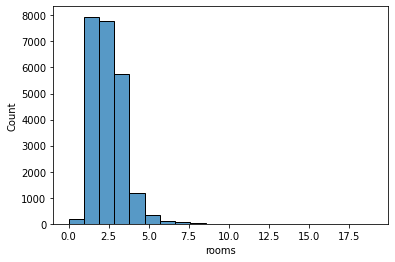

In [50]:
sns.histplot(x='rooms', data=df, bins=20)
plt.show()

In [51]:
display(df[df['rooms'] == 0])

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,ponds_around3000,ponds_nearest,days_exposition,count_kv_metr,day_of_week,month,year,apartment_floor,lv_total,kch_total
144,1,"2,450,000.00",27.00,2017-03-30,0,NaN,24.00,15.50,2,False,...,0.00,NaN,181.00,"90,740.74",Thursday,3,2017,другой,0.57,NaN
349,4,"2,320,000.00",25.00,2017-09-27,0,NaN,14.00,17.00,1,False,...,0.00,NaN,45.00,"92,800.00",Wednesday,9,2017,первый,0.68,NaN
440,8,"2,480,000.00",27.11,2018-03-12,0,NaN,17.00,24.75,4,False,...,2.00,982.00,64.00,"91,479.16",Monday,3,2018,другой,0.91,NaN
508,0,"3,375,000.00",34.40,2017-03-28,0,NaN,26.00,24.30,19,False,...,1.00,593.00,430.00,"98,110.47",Tuesday,3,2017,другой,0.71,NaN
608,2,"1,850,000.00",25.00,2019-02-20,0,NaN,10.00,NaN,7,False,...,0.00,NaN,29.00,"74,000.00",Wednesday,2,2019,другой,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23210,7,"3,200,000.00",26.00,2017-09-01,0,NaN,25.00,18.00,16,False,...,1.00,623.00,14.00,"123,076.92",Friday,9,2017,другой,0.69,NaN
23442,0,"2,500,000.00",27.70,2017-09-28,0,NaN,24.00,18.00,4,False,...,0.00,NaN,4.00,"90,252.71",Thursday,9,2017,другой,0.65,NaN
23554,15,"3,350,000.00",26.00,2018-09-07,0,NaN,19.00,NaN,8,False,...,2.00,112.00,31.00,"128,846.15",Friday,9,2018,другой,NaN,NaN
23592,10,"1,450,000.00",29.00,2017-11-11,0,NaN,9.00,18.00,8,False,...,0.00,NaN,82.00,"50,000.00",Saturday,11,2017,другой,0.62,NaN


In [52]:
display(df[df['rooms'] == 19])

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,ponds_around3000,ponds_nearest,days_exposition,count_kv_metr,day_of_week,month,year,apartment_floor,lv_total,kch_total
14498,6,"32,250,000.00",374.60,2018-06-09,19,NaN,5.00,264.50,2,False,...,2.00,548.00,114.00,"86,091.83",Saturday,6,2018,другой,0.71,0.07


Вывод: Из данных видно что присутвуют такие аномальные значения как 0 комнат, после детального анализа было решено что так обозначены квартиры студии, т.к у всех объектов довольно малая общая площадь. Так же есть квартиры с таким кол-м как 19-ть, после детального рассмотрения было решено что этот объект скорее всего являеться эклюзивным предложением, т.к объект с таким парамметром один. Большую часть выборке составляют квартиры 1-3 комнатные. 

In [53]:
df['ceiling_height'].value_counts()

2.50     3446
2.60     1618
2.70     1563
3.00     1100
2.80      985
         ... 
4.25        1
3.39        1
3.93        1
10.30       1
4.65        1
Name: ceiling_height, Length: 183, dtype: int64

In [54]:
df['ceiling_height'].describe()

count   14,320.00
mean         2.77
std          1.26
min          1.00
25%          2.52
50%          2.65
75%          2.80
max        100.00
Name: ceiling_height, dtype: float64

In [55]:
print('выведем максимальную и минимальную высоту потолка', df['ceiling_height'].max(), df['ceiling_height'].min())

выведем максимальную и минимальную высоту потолка 100.0 1.0


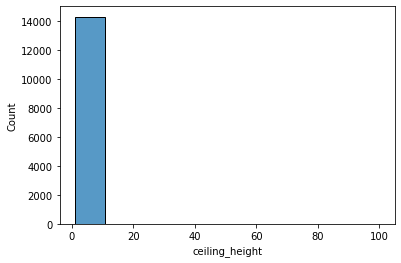

In [56]:
sns.histplot(x='ceiling_height', data=df, bins=10)
plt.show()

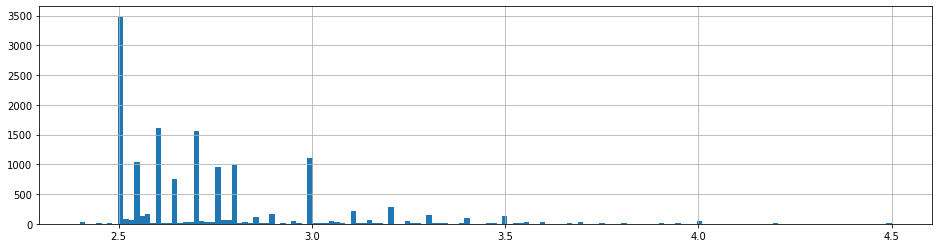

In [57]:
df['ceiling_height'].hist(range = (2.4, 4.5), figsize = (16, 4), bins = 150);

<div class="alert alert-anger">
<font size="4"><b>❌ Комментарий ревьюера</b></font>
    <br /> 
    <font size="3", color = "black">
<br />  Наглядность представления информации один из важных аспектов работы дата-аналитика или дата-сайентиста

Для закрепления навыка настроить наглядное отображение данных на любых двух гистограммах проекта, по приведенному выше примеру

Вывод: Из данных видно, что есть аномальные значения которые вызывают сомнения,  такие как 1м или 100м, что довольно странные значения для высоты потолков. Большая часть выборки составляют квартиры с высотой потолков от 2,5 до 2,8 метра.

### Вывод

На данном этапе были посчитаны и добавлены данные в таблицу. А так же изучены следующие параметры: площадь, цена, число комнат, высота потолков.

## Исследовательский анализ данных

задание: «Изучите время продажи квартиры. Постройте гистограмму. Посчитайте среднее и медиану. Опишите, сколько обычно занимает продажа. Когда можно считать, что продажи прошли очень быстро, а когда необычно долго?»

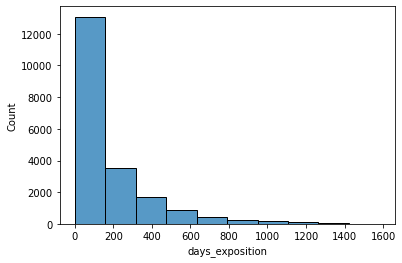

In [58]:
sns.histplot(x='days_exposition', data=df, bins=10)
plt.show()

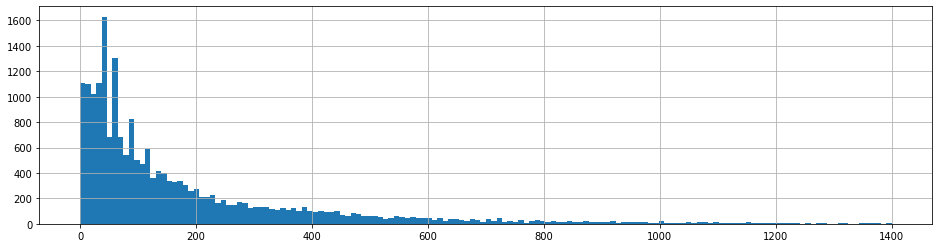

In [59]:
df['days_exposition'].hist(range = (0, 1400), figsize = (16, 4), bins = 150);

In [60]:
df['days_exposition'].describe()

count   20,233.00
mean       181.05
std        219.80
min          1.00
25%         45.00
50%         95.00
75%        232.00
max      1,580.00
Name: days_exposition, dtype: float64

In [61]:
print(' Ср. значение:', df['days_exposition'].mean(), 'Медиана:', df['days_exposition'].median())

 Ср. значение: 181.051697721544 Медиана: 95.0


Вывод: На основе полученных данных можно сделать следующие выводы:
    Обычное время продажи квартиры составляет в районе 3-х месяцев. Быстрой продажей квартиры можно считать если меньше одного месяца, а вот необычно долго более 8-ми месяцев. 

Задание: «Уберите редкие и выбивающиеся значения. Опишите, какие особенности обнаружили»

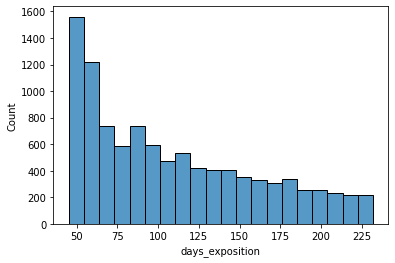

In [62]:
days_exposition = df[(df['days_exposition'] >= 45) & (df['days_exposition'] <= 232)]
sns.histplot(x='days_exposition', data=days_exposition, bins=20)
plt.show()

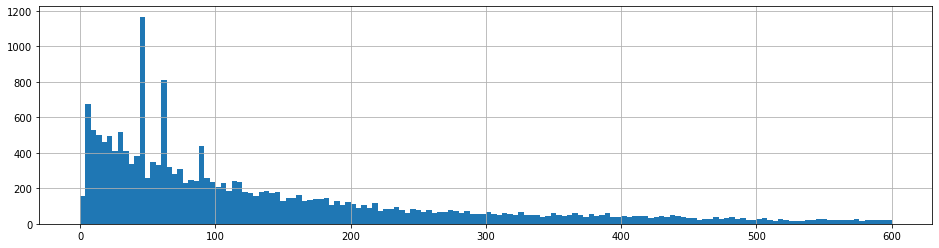

In [63]:
df['days_exposition'].hist(range = (0, 600), figsize = (16, 4), bins = 150);

In [64]:
days_exposition['days_exposition'].describe()

count   10,186.00
mean       108.60
std         52.70
min         45.00
25%         61.00
50%         95.00
75%        147.00
max        232.00
Name: days_exposition, dtype: float64

Вывод: были обнаружены следующие особенности, что квартиры чаще всего продаются в течении двух месяцев. Далее идет убываение кол-ва продашь с увеличением периода продажи.

Задание: «Какие факторы больше всего влияют на стоимость квартиры? Изучите, зависит ли цена от квадратного метра, числа комнат, этажа (первого или последнего), удалённости от центра. Также изучите зависимость от даты размещения: дня недели, месяца и года»

Зависит ли цена от квадратного метра

In [65]:
price_area = df[['total_area', 'last_price']]
print(price_area.head())

   total_area    last_price
0      108.00 13,000,000.00
1       40.40  3,350,000.00
2       56.00  5,196,000.00
3      159.00 64,900,000.00
4      100.00 10,000,000.00


In [66]:
price_area['total_area'].corr(price_area['last_price'])

0.6536089130116186

<AxesSubplot:xlabel='total_area', ylabel='last_price'>

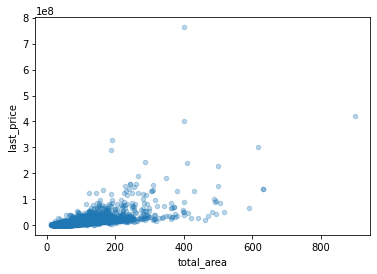

In [67]:
price_area.plot(x='total_area', y='last_price', kind='scatter', alpha=0.3)

<AxesSubplot:xlabel='total_area', ylabel='last_price'>

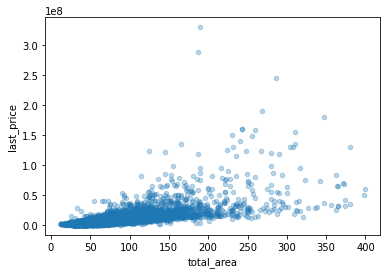

In [68]:
price_area = price_area[price_area['total_area'] < 400]
price_area.plot(x='total_area', y='last_price', kind='scatter', alpha=0.3)

Вывод: из полученных данных видно, что зависимость стоимости и площади квартиры присутвует. Видно что зависимость снижается при увеличении площади (после 100м2).

Зависит ли цена от кол-ва комнат

In [69]:
price_room = df[['last_price', 'rooms']]
print(price_room.head())

     last_price  rooms
0 13,000,000.00      3
1  3,350,000.00      1
2  5,196,000.00      2
3 64,900,000.00      3
4 10,000,000.00      2


In [70]:
price_room['last_price'].corr(price_room['rooms'])

0.36342098410240126

<AxesSubplot:xlabel='last_price', ylabel='rooms'>

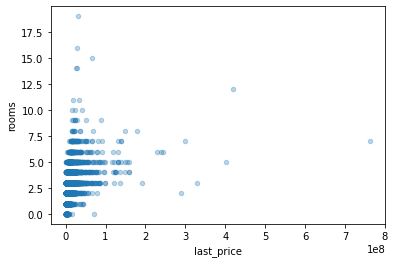

In [71]:
price_room.plot(x='last_price', y='rooms', kind='scatter', alpha=0.3)

<AxesSubplot:xlabel='last_price', ylabel='rooms'>

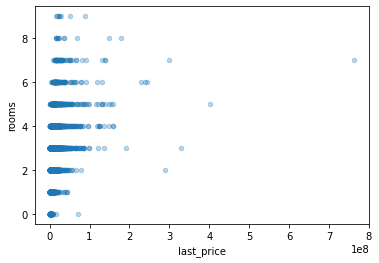

In [72]:
price_room = price_room[price_room['rooms'] < 10]
price_room.plot(x='last_price', y='rooms', kind='scatter', alpha=0.3)

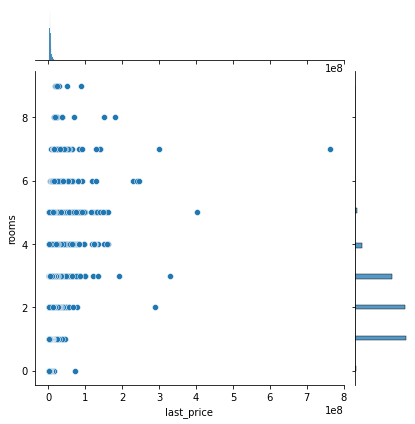

In [73]:
sns.jointplot(x='last_price', y='rooms', data=price_room)
plt.show()

Вывод: из полученных данных видно следующую зависимость: стоимость на квартиры растет с увеличением комнат, но после 5-ти комнат начинает снижение. Так же видно что большего всего предложений на рынке 1-3 комнатных квартир.

Зависит ли цена от этажа (первый, последний)

In [74]:
price_floor = df[['last_price', 'apartment_floor']]
print(price_floor.head())

     last_price apartment_floor
0 13,000,000.00          другой
1  3,350,000.00          первый
2  5,196,000.00          другой
3 64,900,000.00          другой
4 10,000,000.00          другой


<AxesSubplot:xlabel='last_price', ylabel='apartment_floor'>

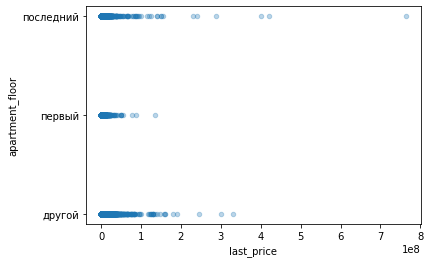

In [75]:
price_floor.plot(x='last_price', y='apartment_floor', kind='scatter', alpha=0.3)

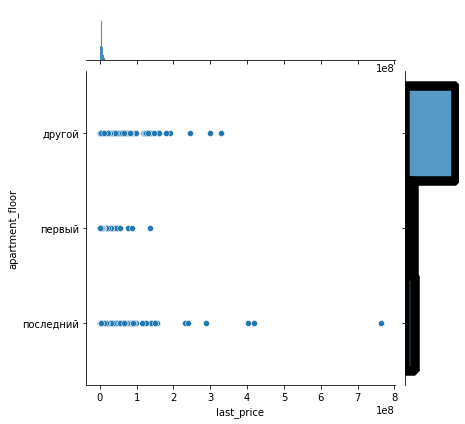

In [76]:
sns.jointplot(x='last_price', y='apartment_floor', data=price_floor)
plt.show()

Вывод: из полученных данных видно что меньше всего стоимость на квартиры на первом этаже. Больше всего на рынке представленно предложений квартир не на 1 и не на последних этажах.

Зависит ли цена от удаленности от центра

In [77]:
price_cityCenters = df[['last_price', 'cityCenters_nearest']]
print(price_cityCenters.head())

     last_price  cityCenters_nearest
0 13,000,000.00            16,028.00
1  3,350,000.00            18,603.00
2  5,196,000.00            13,933.00
3 64,900,000.00             6,800.00
4 10,000,000.00             8,098.00


<AxesSubplot:xlabel='cityCenters_nearest', ylabel='last_price'>

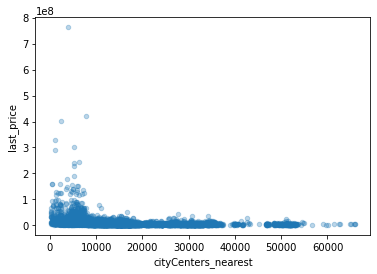

In [78]:
price_cityCenters.plot(x='cityCenters_nearest', y='last_price', kind='scatter', alpha=0.3)

<AxesSubplot:xlabel='cityCenters_nearest', ylabel='last_price'>

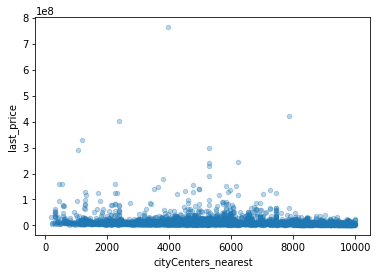

In [79]:
price_cityCenters = price_cityCenters[price_cityCenters['cityCenters_nearest'] < 10000]
price_cityCenters.plot(x='cityCenters_nearest', y='last_price', kind='scatter', alpha=0.3)

Вывод: заметный рост стоимости виден на предложения меньше 10км. Скорее всего это связано с расположением в центральной части города.

Зависит ли цена от даты размещения:

День недели

In [80]:
price_day_of_week = df[['last_price', 'day_of_week']]
print(price_day_of_week.head())

     last_price day_of_week
0 13,000,000.00    Thursday
1  3,350,000.00     Tuesday
2  5,196,000.00    Thursday
3 64,900,000.00      Friday
4 10,000,000.00     Tuesday


<AxesSubplot:xlabel='last_price', ylabel='day_of_week'>

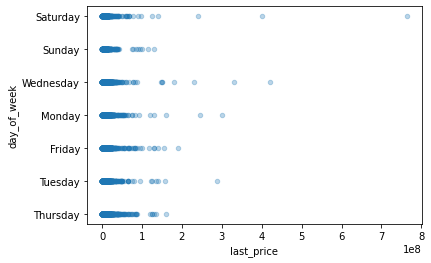

In [81]:
price_day_of_week.plot(x='last_price', y='day_of_week', kind='scatter', alpha=0.3)

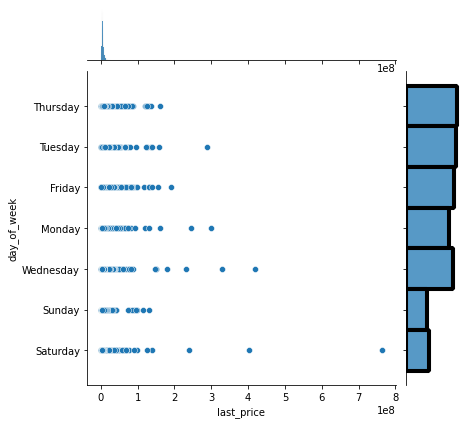

In [82]:
sns.jointplot(x='last_price', y='day_of_week', data=price_day_of_week)
plt.show()

Вывод: из полученных данных видно что меньше всего размещается предложений в субботу и воскресенье. Стоимость на квартиры размещенные в среду заметнее ниже чем в другие дни.

In [83]:
price_month = df[['last_price', 'month']]
print(price_month.head())

     last_price  month
0 13,000,000.00      3
1  3,350,000.00     12
2  5,196,000.00      8
3 64,900,000.00      7
4 10,000,000.00      6


<AxesSubplot:xlabel='last_price', ylabel='month'>

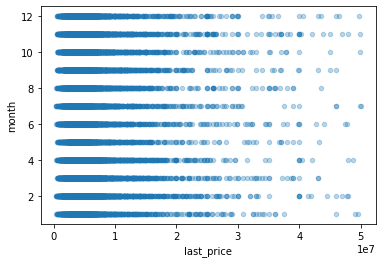

In [84]:
price_month = price_month[price_month['last_price'] < 50000000]
price_month.plot(x='last_price', y='month', kind='scatter', alpha=0.3)

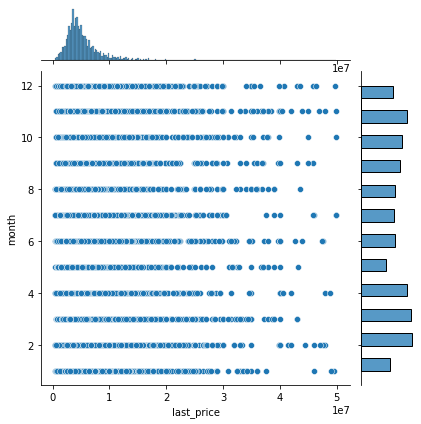

In [85]:
sns.jointplot(x='last_price', y='month', data=price_month)
plt.show()

Вывод: из полученных данных видно что чаще всего объявления о продажи размещают осенью и весной. Рост цен на квартиры виден с сентбря по ноябрь и февраля по апрель. В мае ризкое подение продаж.

In [86]:
price_year = df[['last_price', 'year']]
print(price_year.head())

     last_price  year
0 13,000,000.00  2019
1  3,350,000.00  2018
2  5,196,000.00  2015
3 64,900,000.00  2015
4 10,000,000.00  2018


<AxesSubplot:xlabel='last_price', ylabel='year'>

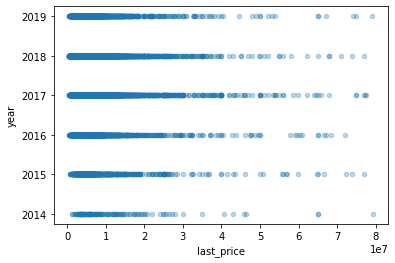

In [87]:
price_year = price_year[price_year['last_price'] < 80000000]
price_year.plot(x='last_price', y='year', kind='scatter', alpha=0.3)

Вывод: из получившихся данных видно что больше всего продавали квартиры в 2017-2018 году. Так же виден рост цен в 2017 году на квартиры.

Задание: «Выберите 10 населённых пунктов с наибольшим числом объявлений. Посчитайте среднюю цену квадратного метра в этих населённых пунктах. Выделите населённые пункты с самой высокой и низкой стоимостью жилья. Эти данные можно найти по имени в столбце locality_name»

In [88]:
df.groupby('locality_name')['last_price'].agg(['mean']).sort_values('mean', ascending = True).head(10)

,mean
locality_name,
деревня вахнова кара,"450,000.00"
деревня старополье,"460,000.00"
деревня чудской бор,"500,000.00"
поселок совхозный,"517,500.00"
поселок станции свирь,"575,000.00"
деревня выскатка,"585,000.00"
деревня ям-тесово,"625,000.00"
поселок цвылево,"650,000.00"
деревня фалилеево,"650,000.00"


In [89]:
df.groupby('locality_name')['last_price'].agg(['mean']).sort_values('mean', ascending = False).head(10)

,mean
locality_name,
поселок репино,"12,166,854.00"
деревня хязельки,"11,000,000.00"
деревня бор,"10,397,600.00"
поселок александровская,"8,725,000.00"
санкт-петербург,"8,111,008.40"
пушкин,"6,482,354.94"
сестрорецк,"6,341,722.08"
зеленогорск,"6,288,337.50"
поселок стрельна,"4,984,500.00"


"Вывод: как видно из полученных данных самые дорогие объекты размещены не в городе Санкт - Петербург, а за городом. Есть предположение что это связано с тем что там представлены не квартиры, а загородная недвижимость (коттеджи)"
Вывод перенес ниже

In [91]:
# check TOP-10

(
    df
    .groupby('locality_name')['count_kv_metr']
    .agg({'count', 'mean'})
    .sort_values(by = 'mean', ascending = False)
    .head(10)
    
)

,mean,count
locality_name,,
зеленогорск,"115,122.80",24
санкт-петербург,"115,053.01",15437
поселок репино,"104,238.61",4
пушкин,"103,161.02",367
сестрорецк,"101,757.62",183
поселок лисий нос,"100,660.81",3
кудрово,"100,253.04",173
деревня мистолово,"98,549.98",11
поселок левашово,"96,997.69",1


In [92]:
# check TOP-10

(
    df
    .groupby('locality_name')['count_kv_metr']
    .agg({'count', 'mean'})
    .sort_values(by = 'count', ascending = False)
    .head(10)
    
).sort_values(by = 'mean', ascending = False)

,mean,count
locality_name,,
санкт-петербург,"115,053.01",15437
пушкин,"103,161.02",367
деревня кудрово,"92,473.55",299
поселок парголово,"90,175.91",327
поселок мурино,"85,694.72",555
поселок шушары,"78,757.89",437
колпино,"75,478.69",336
гатчина,"68,730.82",306
всеволожск,"68,651.08",397


Вывод: как видно из полученных данных самые дорогие объекты (если смотреть не по количеству, а по максимальной цене объекта) размещены не в городе Санкт - Петербург, а за городом. Есть предположение что это связано с тем что там представлены не квартиры, а загородная недвижимость (коттеджи). Стоит отметить, что по кол-ву самых дорогих объектов СПБ занимает лидирующее место с отрывом.

 Задание: «Изучите предложения квартир: для каждой квартиры есть информация о расстоянии до центра. Выделите квартиры в Санкт-Петербурге (locality_name). Ваша задача — выяснить, какая область входит в центр. Создайте столбец с расстоянием до центра в километрах: округлите до целых значений. После этого посчитайте среднюю цену для каждого километра. Постройте график: он должен показывать, как цена зависит от удалённости от центра. Определите границу, где график сильно меняется — это и будет центральная зона».

Удалим редкие и выбивающиеся значения из датасета df

Удалим квартиру с 19-ю комнатами

In [93]:
df = df[df['rooms'] != 19]

In [94]:
display(df.sort_values(by='last_price', ascending=False).head(10))

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,ponds_around3000,ponds_nearest,days_exposition,count_kv_metr,day_of_week,month,year,apartment_floor,lv_total,kch_total
12971,19,"763,000,000.00",400.00,2017-09-30,7,NaN,10.00,250.00,10,False,...,3.00,756.00,33.00,"1,907,500.00",Saturday,9,2017,последний,0.62,NaN
19540,8,"420,000,000.00",900.00,2017-12-06,12,2.80,25.00,409.70,25,False,...,2.00,318.00,106.00,"466,666.67",Wednesday,12,2017,последний,0.46,0.12
14706,15,"401,300,000.00",401.00,2016-02-20,5,NaN,9.00,204.00,9,False,...,1.00,478.00,393.00,"1,000,748.13",Saturday,2,2016,последний,0.51,0.06
1436,19,"330,000,000.00",190.00,2018-04-04,3,3.50,7.00,95.00,5,False,...,3.00,285.00,233.00,"1,736,842.11",Wednesday,4,2018,другой,0.50,0.21
15651,20,"300,000,000.00",618.00,2017-12-18,7,3.40,7.00,258.00,5,False,...,2.00,198.00,111.00,"485,436.89",Monday,12,2017,другой,0.42,0.11
22831,18,"289,238,400.00",187.50,2019-03-19,2,3.37,6.00,63.70,6,False,...,3.00,188.00,NaN,"1,542,604.80",Tuesday,3,2019,последний,0.34,0.16
16461,17,"245,000,000.00",285.70,2017-04-10,6,3.35,7.00,182.80,4,False,...,3.00,140.00,249.00,"857,542.88",Monday,4,2017,другой,0.64,0.10
13749,7,"240,000,000.00",410.00,2017-04-01,6,3.40,7.00,218.00,7,False,...,2.00,198.00,199.00,"585,365.85",Saturday,4,2017,последний,0.53,0.10
5893,3,"230,000,000.00",500.00,2017-05-31,6,NaN,7.00,NaN,7,False,...,2.00,198.00,50.00,"460,000.00",Wednesday,5,2017,последний,NaN,0.08
8900,13,"190,870,000.00",268.00,2016-03-25,3,NaN,8.00,132.00,7,False,...,2.00,198.00,901.00,"712,201.49",Friday,3,2016,другой,0.49,0.15


Далее удалим самую дорогую квартиру, т.к. у нее сильное отклонение от остальных объявлений

In [95]:
df = df[df['last_price'] != 763000000.00]

In [96]:
flat_spb = df
flat_spb['cityCenters_nearest_km'] = flat_spb['cityCenters_nearest'] / 1000
flat_spb['centr_spb'] =  df[df['locality_name'] == 'санкт-петербург']['cityCenters_nearest_km'].fillna(0).astype('int')
flat_spb = flat_spb[flat_spb['centr_spb'] != 0]


<AxesSubplot:xlabel='centr_spb', ylabel='last_price'>

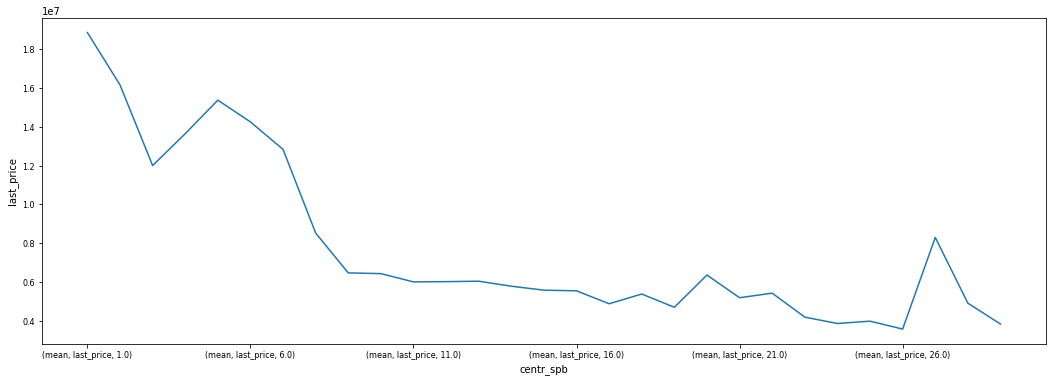

In [97]:
flat_spb_mean = flat_spb.pivot_table(index='centr_spb', values=['last_price'], aggfunc=['mean'])
flat_spb_mean.unstack().plot(x='centr_spb', y='last_price', xlabel='centr_spb', ylabel='last_price', figsize=(18,6), fontsize=8, sharex=False)




<AxesSubplot:xlabel='centr_spb', ylabel='last_price'>

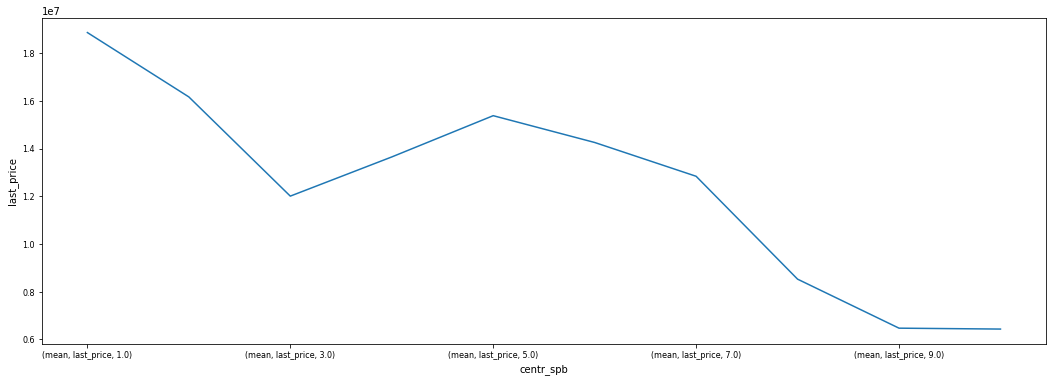

In [98]:
flat_spb_mean[:10].unstack().plot(x='centr_spb', y='last_price', xlabel='centr_spb', ylabel='last_price', figsize=(18,6), fontsize=8, sharex=False)


Вывод: исходя из полученных данных, видно что зона центральной части города начинается с расстояния 9км. т.к резко начинает рости стоимость жилья.

Задание: «Выделите сегмент квартир в центре. Проанализируйте эту территорию и изучите следующие параметры: площадь, цена, число комнат, высота потолков. Также выделите факторы, которые влияют на стоимость квартиры (число комнат, этаж, удалённость от центра, дата размещения объявления). Сделайте выводы. Отличаются ли они от общих выводов по всей базе?»

In [99]:
flat_spb_centr = flat_spb[flat_spb['centr_spb'] < 10]
flat_spb_centr = flat_spb_centr[flat_spb_centr['total_area'] < 400]


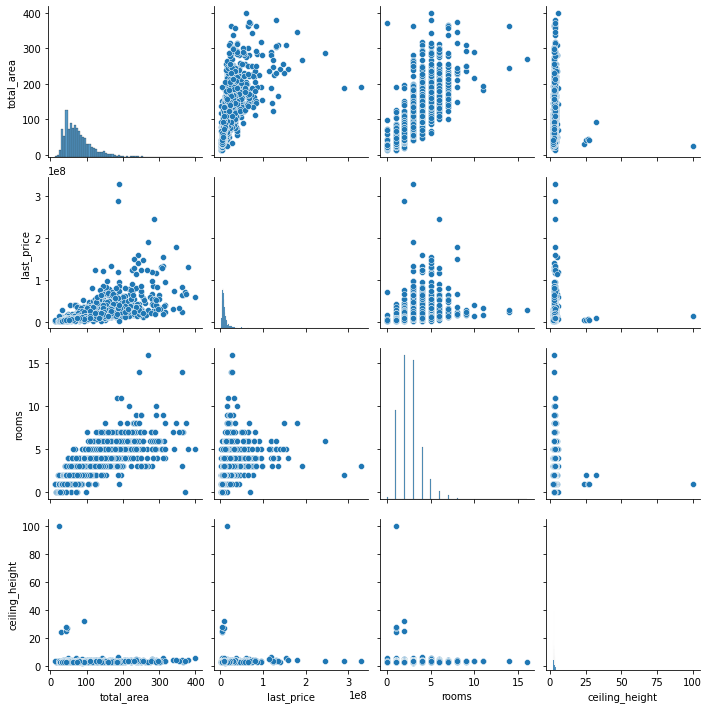

In [100]:
flat_spb_1 = flat_spb_centr[['total_area', 'last_price', 'rooms', 'ceiling_height']]
sns.pairplot(flat_spb_1)
plt.show()

In [101]:
print('площадь - цена', flat_spb_centr['total_area'].corr(flat_spb_centr['last_price']))
print('площадь - кол-во комнат', flat_spb_centr['total_area'].corr(flat_spb_centr['rooms']))
print('площадь - высота потолков', flat_spb_centr['total_area'].corr(flat_spb_centr['ceiling_height']))
print('цена - кол-во комнат', flat_spb_centr['last_price'].corr(flat_spb_centr['rooms']))
print('цена - высота потолков', flat_spb_centr['last_price'].corr(flat_spb_centr['ceiling_height']))
print('кол-во комнат - высота потолков', flat_spb_centr['rooms'].corr(flat_spb_centr['ceiling_height']))

площадь - цена 0.6581230928006158
площадь - кол-во комнат 0.783238268342859
площадь - высота потолков 0.052869616952766305
цена - кол-во комнат 0.37187505308645474
цена - высота потолков 0.054648903055437945
кол-во комнат - высота потолков 0.029308246366423023


In [102]:
# check
flat_spb_centr[['total_area', 'last_price', 'rooms', 'ceiling_height']].corr()

,total_area,last_price,rooms,ceiling_height
total_area,1.00,0.66,0.78,0.05
last_price,0.66,1.00,0.37,0.05
rooms,0.78,0.37,1.00,0.03
ceiling_height,0.05,0.05,0.03,1.00


Зависит ли цена от кол-ва комнат

In [103]:
price_room = flat_spb_centr[['last_price', 'rooms']]
print(price_room.head())

      last_price  rooms
3  64,900,000.00      3
4  10,000,000.00      2
21  3,200,000.00      1
24  6,500,000.00      2
35 15,500,000.00      5


<AxesSubplot:xlabel='last_price', ylabel='rooms'>

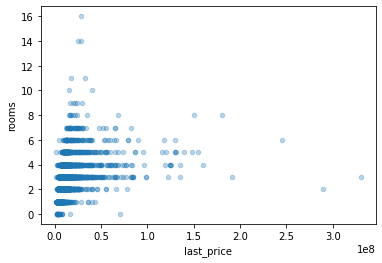

In [104]:
price_room.plot(x='last_price', y='rooms', kind='scatter', alpha=0.3)

<AxesSubplot:xlabel='last_price', ylabel='rooms'>

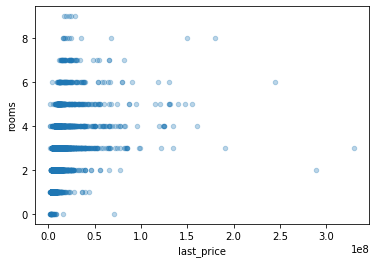

In [105]:
price_room = price_room[price_room['rooms'] < 10]
price_room.plot(x='last_price', y='rooms', kind='scatter', alpha=0.3)

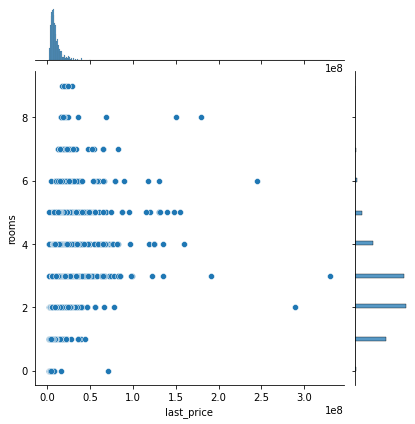

In [106]:
sns.jointplot(x='last_price', y='rooms', data=price_room)
plt.show()

Вывод: из полученных данных видно следующую зависимость: стоимость на квартиры растет с увеличением комнат, но после 5-ти комнат начинает снижение. Так же видно что большего всего предложений на рынке 1-3 комнатных квартир.

Зависит ли цена от этажа (первый, последний)

In [107]:
price_floor = flat_spb_centr[['last_price', 'apartment_floor']]
print(price_floor.head())

      last_price apartment_floor
3  64,900,000.00          другой
4  10,000,000.00          другой
21  3,200,000.00          другой
24  6,500,000.00          первый
35 15,500,000.00          другой


<AxesSubplot:xlabel='last_price', ylabel='apartment_floor'>

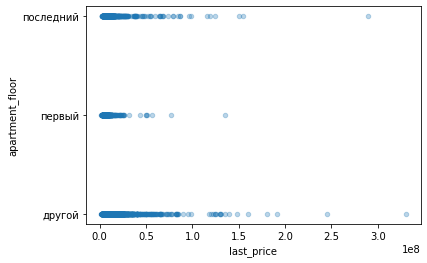

In [108]:
price_floor.plot(x='last_price', y='apartment_floor', kind='scatter', alpha=0.3)

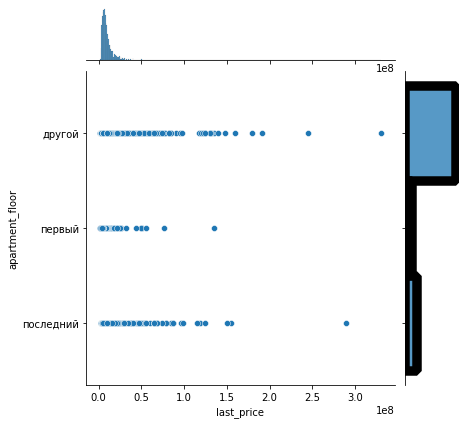

In [109]:
sns.jointplot(x='last_price', y='apartment_floor', data=price_floor)
plt.show()

Вывод: видно что больше всего объявлений опродаже представлено квартир не на первом и последнем этаже. Так же видно что стоимость квартир на первом этаже меньше чем на других

Зависит ли цена от удаленности от центра

In [110]:
price_cityCenters = flat_spb_centr[['last_price', 'centr_spb']]
print(price_cityCenters.head())

      last_price  centr_spb
3  64,900,000.00       6.00
4  10,000,000.00       8.00
21  3,200,000.00       9.00
24  6,500,000.00       2.00
35 15,500,000.00       3.00


In [111]:
print('кол-во комнат - высота потолков', flat_spb_centr['centr_spb'].corr(flat_spb_centr['last_price']))

кол-во комнат - высота потолков -0.17663589508286837


<AxesSubplot:xlabel='centr_spb', ylabel='last_price'>

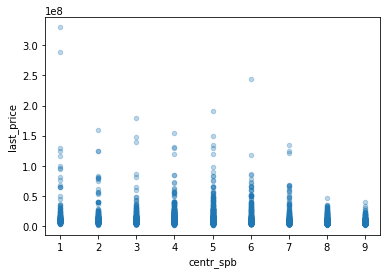

In [112]:
price_cityCenters.plot(x='centr_spb', y='last_price', kind='scatter', alpha=0.3)

Вывод: из полученных данных видно , что взаимосвязь данных довольно низкая

Зависит ли цена от даты размещения:

День недели

In [113]:
price_day_of_week = flat_spb_centr[['last_price', 'day_of_week']]
print(price_day_of_week.head())

      last_price day_of_week
3  64,900,000.00      Friday
4  10,000,000.00     Tuesday
21  3,200,000.00   Wednesday
24  6,500,000.00    Saturday
35 15,500,000.00      Monday


<AxesSubplot:xlabel='last_price', ylabel='day_of_week'>

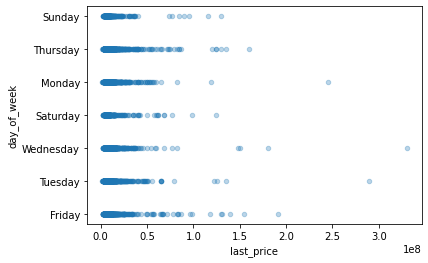

In [114]:
price_day_of_week.plot(x='last_price', y='day_of_week', kind='scatter', alpha=0.3)

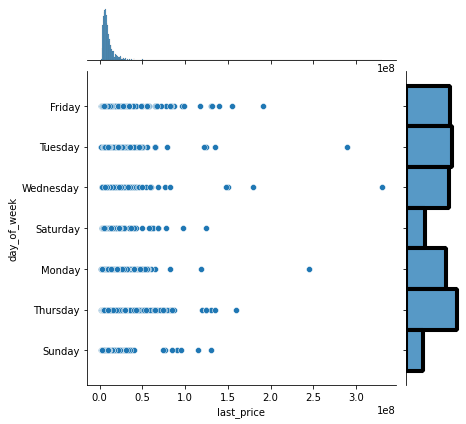

In [115]:
sns.jointplot(x='last_price', y='day_of_week', data=price_day_of_week)
plt.show()

Вывод: из полученных данных видно что меньше всего размещается предложений в субботу и воскресенье. 

Месяц

In [116]:
price_month = flat_spb_centr[['last_price', 'month']]
print(price_month.head())

      last_price  month
3  64,900,000.00      7
4  10,000,000.00      6
21  3,200,000.00      3
24  6,500,000.00     10
35 15,500,000.00      6


<AxesSubplot:xlabel='last_price', ylabel='month'>

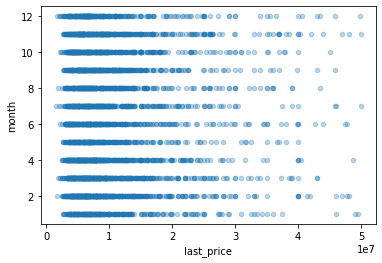

In [117]:
price_month = price_month[price_month['last_price'] < 50000000]
price_month.plot(x='last_price', y='month', kind='scatter', alpha=0.3)

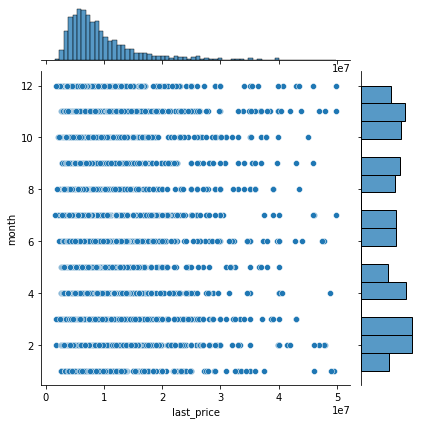

In [118]:
sns.jointplot(x='last_price', y='month', data=price_month)
plt.show()

Вывод: из полученных данных видно что чаще всего объявления о продажи размещают осенью и весной. Рост цен на квартиры виден с сентебря по ноябрь и с февраля по апрель.

По годам

In [119]:
price_year = flat_spb_centr[['last_price', 'year']]
print(price_year.head())

      last_price  year
3  64,900,000.00  2015
4  10,000,000.00  2018
21  3,200,000.00  2018
24  6,500,000.00  2015
35 15,500,000.00  2017


<AxesSubplot:xlabel='last_price', ylabel='year'>

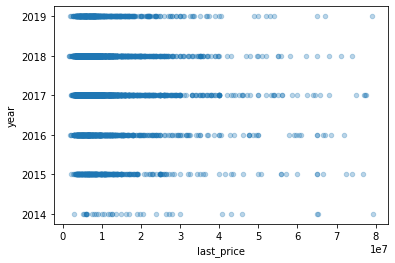

In [120]:
price_year = price_year[price_year['last_price'] < 80000000]
price_year.plot(x='last_price', y='year', kind='scatter', alpha=0.3)

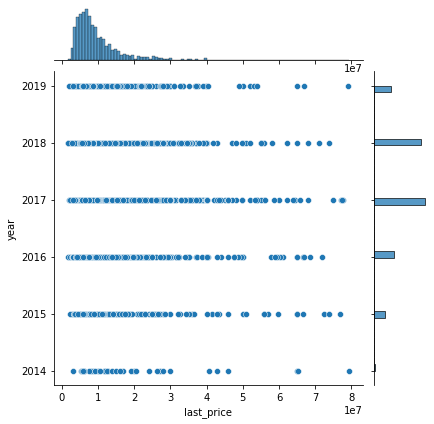

In [121]:
sns.jointplot(x='last_price', y='year', data=price_year)
plt.show()

Вывод: из получившихся данных видно что больше всего продавали квартиры в 2017-2018 году. Так же виден рост цен в 2017 году на квартиры.

Как изменилось соотношение кол-ва объявлений о продаже одно, двух и трех комнатных квартир по всей выборке и по центру, а как изменилась высота потолков

In [122]:
print('Как изменилось соотношение кол-ва объявлений о продаже одно комнатных квартир по всей выборке', df[df['rooms'] == 1]['rooms'].count())
print('Как изменилось соотношение кол-ва объявлений о продаже одно комнатных квартир по центру', flat_spb_centr[flat_spb_centr['rooms'] == 1]['rooms'].count())
print()
print('Как изменилось соотношение кол-ва объявлений о продаже  двух комнатных квартир по всей выборке', df[df['rooms'] == 2]['rooms'].count())
print('Как изменилось соотношение кол-ва объявлений о продаже  двух комнатных квартир  по центру', flat_spb_centr[flat_spb_centr['rooms'] == 2]['rooms'].count())
print()
print('Как изменилось соотношение кол-ва объявлений о продаже трех комнатных квартир по всей выборке', df[df['rooms'] == 3]['rooms'].count())
print('Как изменилось соотношение кол-ва объявлений о продаже трех комнатных квартир по центру', flat_spb_centr[flat_spb_centr['rooms'] == 3]['rooms'].count())
print()

Как изменилось соотношение кол-ва объявлений о продаже одно комнатных квартир по всей выборке 7949
Как изменилось соотношение кол-ва объявлений о продаже одно комнатных квартир по центру 946

Как изменилось соотношение кол-ва объявлений о продаже  двух комнатных квартир по всей выборке 7796
Как изменилось соотношение кол-ва объявлений о продаже  двух комнатных квартир  по центру 1530

Как изменилось соотношение кол-ва объявлений о продаже трех комнатных квартир по всей выборке 5757
Как изменилось соотношение кол-ва объявлений о продаже трех комнатных квартир по центру 1479



Вывод: как видно соотношение кол-ва объявлений о продаже поменялось следующим образом: одно комнатные квартиры стали продаваться реже, чем 2-х и 3-х комнатные в центре города, а чаще стали продаватся 2-х комнатные квартиры.

Ответ на вопрос: В центре Питера квартиры продаются быстрее чем по всей выборке?

In [123]:
df['days_exposition'].describe()

count   20,231.00
mean       181.06
std        219.81
min          1.00
25%         45.00
50%         95.00
75%        232.00
max      1,580.00
Name: days_exposition, dtype: float64

In [124]:
flat_spb_centr['days_exposition'].describe()

count   4,148.00
mean      228.21
std       262.83
min         2.00
25%        54.00
50%       121.00
75%       312.00
max     1,512.00
Name: days_exposition, dtype: float64

Вывод: из данных видно, что чаще встречаются объявления с меньших кол-м дней экспозиции в общей выборке, чем в центре СПБ. Отсюда можно сделать вывод что квартиры из общей выборке продаются быстрее чем квартиры в центре СПБ.

Ответ на вопрос: "В центре Питера стоимость квадратного метра на сколько превышает такой же показатель по всей выборке?"

In [125]:
df['count_kv_metr'].describe()

count      23,386.00
mean       99,333.81
std        48,826.32
min         7,962.96
25%        76,470.59
50%        95,000.27
75%       114,318.39
max     1,736,842.11
Name: count_kv_metr, dtype: float64

In [126]:
flat_spb_centr['count_kv_metr'].describe()

count       4,904.00
mean      134,799.84
std        73,868.52
min        15,345.27
25%        98,007.11
50%       118,421.05
75%       146,277.96
max     1,736,842.11
Name: count_kv_metr, dtype: float64

In [127]:
print('В центре Питера стоимость квадратного метра  превышает такой же показатель по всей выборке : ', flat_spb_centr['count_kv_metr'].mean() / df['count_kv_metr'].mean())

В центре Питера стоимость квадратного метра  превышает такой же показатель по всей выборке :  1.3570388837171954


### Вывод

На данном этапе можно сдлать вывод что стоимоть квартиры зависит площади, отдаленности от центра, этажа. Было найденно что высота потолков не влияет на стоимость. Так же было замечено что стоимость квартир заметно выше осенью и весною. В 2017-2018 году был пик роста цен на квартиры

## Общий вывод

Можно сделать следующий вывод, что на стоимость жилья влияют следующие показатели: площадь (стоит заметить что после 100м2 стоимоть меньше растет взависимости от площади), этажа (первый этаж стоит дешевле всех других), отдаленности от центра города (центр города начинается после 9 км). Так же выявлены сезонные факторы: рост квартир происходит весною и осенью, реское падение январь, май. Высота потолков никак не влияет на стоимоть квартир. Были установлено, что в центре чаще выставлены объявления о продаже 2-х комнатных, чем в общей выборке (в общей выборке чаще продаются однушки). В центре СПБ квартиры продаются медленее чем в общей выборке. Стоимость кв. метра в центре СПБ выще на 1,4 по отношению к общей выборке.
Фейковые обявления можно определить по следующим парамметрам: стоимость квартиры заметно ниже средней стоимости к вартир в районе продаж ( данные объявления могут служить например для снижения средней рыночной стоимости). Так же фейковые объявления можно обнаружить по похожим парамметрам и рачные лишь в стоимости на определенную константу (данные объявления являются скорее всего о настоящих объектах, но размешены перекупами, из-за этого стоимость и разлечается на определенную константу (комиссию).). 